## Clustering and Fundamentals of Matrix Theory

## Scope and Objectives

### Scope

In this lab I will build clustering models to group data samples into similar groups. The lab will test my knowledge in fundamental linear algebra concepts such as matrix factorization, unitary matrices, matrices power and dot product, eigenvalue decomposition, and singular value decomposition.

### Objectives

In this lab, I will: 
1. Generate clustering data with specified number of features

2. Perform exploratory data analysis on the dataset. Analysis aspects to pay attention to
    - What are the features' data types?
    - Are the features normalized -- do they have a mean of 0 and a standard deviation of 1?
    - Are the features correlated? Use pandas corr() method to compute and display the correlation matrix.
    - What is the shape of the dataset -- number of instances and number of features?

3. Split the dataset into training and test data subsets with a pre-defined ratio.

4. Standardize the dataset and validate the obtained results. Avoid data leakage by not involving the test dataset in the standardization fitting.

5. Perform singular values decomposition of a matrix and its covariance matrix
    - Understand unitary matrices
    - Understand standard vectors 
    - Understand the relationship between matrix power and the power of its singular values
    - Other topics are left as a bonus assignment.

6. Train clustering models and analyze their performance.

In [1]:
# Import required libraries
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN, HDBSCAN  
from sklearn.cluster import SpectralClustering
from sklearn.cluster import Birch
from sklearn.cluster import OPTICS
from sklearn.cluster import AffinityPropagation
from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# generate dataset for clustering
n_samples = 1_500
n_features = 15
n_centers = 5
cluster_std = 4
X, y = make_blobs(n_samples=n_samples, 
                    n_features=n_features, 
                    centers=n_centers, 
                    cluster_std=[cluster_std]*n_centers, 
                    random_state=1111)

In [3]:
# display the shape of X and y
X.shape, y.shape

((1500, 15), (1500,))

In [4]:
# display the mean and std of the features
np.mean(X, axis=0)

array([-5.98550491, -1.74696398,  3.69959675,  1.43936813,  0.87739607,
       -0.73752246,  1.19451883,  1.07754609,  2.42445224,  3.38851948,
       -0.66038307, -3.20677176,  0.72858359, -0.8569982 , -1.3660196 ])

In [5]:
np.std(X, axis=0)

array([4.1262983 , 6.53525042, 5.99777475, 5.85595182, 8.78098144,
       6.99641883, 6.72551526, 6.75798792, 6.02194382, 7.20708374,
       6.55591489, 7.17758138, 6.93641274, 5.42276255, 6.97302379])

In [6]:
# display the frequency of each unique value in the label vector
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4]), array([300, 300, 300, 300, 300]))

In [7]:
# split the data into training and test datasets.
# test size = 0.1
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, stratify=y)

In [8]:
# display the shape of Xtrain, Xtest, ytrain, ytest
print(f"shape of Xtrain: {Xtrain.shape}")
print(f"shape of Xtest: {Xtest.shape}")
print(f"shape of ytrain: {ytrain.shape}")
print(f"shape of ytest: {ytest.shape}")

shape of Xtrain: (1350, 15)
shape of Xtest: (150, 15)
shape of ytrain: (1350,)
shape of ytest: (150,)


In [9]:
# display the mean of the features in Xtrain: Are the mean values equal to zero?
np.mean(Xtrain, axis=0)

array([-6.00855848, -1.72595372,  3.70211153,  1.43560884,  0.88743262,
       -0.75319157,  1.22592334,  1.04689138,  2.42534663,  3.37655278,
       -0.61931766, -3.16099019,  0.7306373 , -0.89715846, -1.39843057])

In [10]:
# display the std of the features in Xtrain: Are the std values equal to one?
np.std(Xtrain, axis=0)

array([4.1106807 , 6.55208366, 5.98930331, 5.84931327, 8.7727284 ,
       6.98642508, 6.76452685, 6.75107983, 5.98813714, 7.22273651,
       6.52082846, 7.17319191, 6.91294986, 5.40673122, 6.97821562])

In [11]:
# Standardizing the features because the std values above are not close to 1
scaler = StandardScaler() 
Xtrain_s = scaler.fit_transform(Xtrain)
Xtest_s = scaler.transform(Xtest)

In [12]:
# verify that Xtrain is perfectly standardized.
np.mean(Xtrain_s, axis=0) 

array([-5.94709467e-16,  2.10119987e-16,  5.93023573e-16, -1.98030892e-16,
        2.38492353e-17,  5.08235429e-17,  2.38903547e-16,  1.27470051e-16,
        9.79545663e-16, -7.92452523e-16, -1.28826990e-16,  6.17284002e-16,
        5.65802549e-17,  1.92479777e-16,  6.87515888e-17])

In [13]:
np.std(Xtrain_s, axis=0) 

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
# check if the Xtest is standardized. Explain why Yes or No.
np.mean(Xtest_s, axis=0) 

array([ 0.05608211, -0.03206653, -0.00419878,  0.00642688, -0.01144063,
        0.02242795, -0.04642529,  0.04540711, -0.0014936 ,  0.0165681 ,
       -0.06297576, -0.06382316, -0.00297081,  0.07427826,  0.04644593])

In [15]:
np.std(Xtest_s, axis=0) 

array([1.03600151, 0.97352849, 1.01404768, 1.01127358, 1.00930979,
       1.01399054, 0.93970801, 1.00926706, 1.05509663, 0.97798613,
       1.05087278, 1.00427897, 1.03343515, 1.02685137, 0.99155632])

In [16]:
# display the correlation matrix of Xtrain.
# What is the maximum and minimum correlation values other than 1.00 (the diagonal elements)
pd.DataFrame(Xtrain).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000,-0.195371,0.233695,0.084711,0.143327,0.185614,0.061080,-0.006612,-0.036372,0.152061,0.191179,-0.034355,0.049783,0.007032,0.099963
1,-0.195371,1.000000,-0.450621,-0.378664,-0.578856,-0.286167,-0.328618,0.231684,-0.074434,0.093021,-0.381474,0.216907,-0.082988,-0.209160,0.060721
2,0.233695,-0.450621,1.000000,0.355265,0.359341,0.443946,0.022206,-0.165084,0.037150,0.292378,0.528973,0.012328,0.243260,0.074523,0.256914
3,0.084711,-0.378664,0.355265,1.000000,0.338936,-0.007037,-0.058447,-0.534520,0.337810,0.011761,0.245335,0.162626,0.480519,0.251442,0.102384
4,0.143327,-0.578856,0.359341,0.338936,1.000000,0.150825,0.161075,-0.318114,-0.168784,-0.147601,0.171332,0.068551,0.089634,-0.077991,-0.364881
5,0.185614,-0.286167,0.443946,-0.007037,0.150825,1.000000,0.060137,0.281554,-0.245031,0.452123,0.521451,-0.139525,-0.114777,-0.127948,0.319220
6,0.061080,-0.328618,0.022206,-0.058447,0.161075,0.060137,1.000000,0.173423,0.065674,-0.429478,0.027234,-0.629903,-0.399634,0.272128,-0.251778
7,-0.006612,0.231684,-0.165084,-0.534520,-0.318114,0.281554,0.173423,1.000000,-0.352343,0.147973,0.014234,-0.330745,-0.546882,-0.177685,0.067238
8,-0.036372,-0.074434,0.037150,0.337810,-0.168784,-0.245031,0.065674,-0.352343,1.000000,-0.203906,0.081238,-0.125843,0.342250,0.476961,0.188996
9,0.152061,0.093021,0.292378,0.011761,-0.147601,0.452123,-0.429478,0.147973,-0.203906,1.000000,0.375924,0.329812,0.213233,-0.252582,0.508542


In [17]:
# 1) display the singular values of the covariance matrix of X_train 
       # use the method numpy.linalg.svd(Xtrain_s)
       # the method returns U, s, Vh. Refer to the slides for details
       # compute the covariance matrix without dividing by N
# 2) obtain the singular vectors and store them in the matrix V
# (refer to the slides; slide 31)
# Singular and Eigen values of the covariance matrix are identical 
Cov = Xtrain_s.T.dot(Xtrain_s)
U, S, Vh = np.linalg.svd(Cov)
print(S)

[4477.91475083 3586.03091438 3475.5485934  2490.40408613 1205.84829702
  668.36173704  611.76152124  592.59918045  530.27032382  497.0395798
  483.65430116  457.22764121  430.57330253  394.51580646  348.24996453]


In [18]:
# Advanced: The sqrt of the obtain singular values above are the singular values of Xtrain_s
U1, S1, Vh1 = np.linalg.svd(Xtrain_s)
print(S1)
print(np.sqrt(S))

[66.91722313 59.88347781 58.95378354 49.9039486  34.72532645 25.85269303
 24.73381332 24.34336009 23.02759918 22.29438449 21.9921418  21.38288197
 20.7502603  19.86242197 18.66145666]
[66.91722313 59.88347781 58.95378354 49.9039486  34.72532645 25.85269303
 24.73381332 24.34336009 23.02759918 22.29438449 21.9921418  21.38288197
 20.7502603  19.86242197 18.66145666]


In [19]:
# compute the power of the matrix X_train_s
# The power is the sum of the square of all the elements of the matrix
p = np.power(Xtrain_s, 2).sum()
print(p)

20250.0


In [20]:
# compute the power of the singular values of the matrix 
sum(S1**2)

np.float64(20250.000000000007)

In [21]:
# The matrix U and the matrix V are unitary
# implications: Each pair of columns of V are orthogonal (their dot product = 0)
#             : the power of each column = 1
V = Vh.T

# an example that applies to any pair of columns
v0 = V[:, 0]
v1 = V[:, 1]

print('The dot product of two orthogonal columns {:.2f}'.format(v0.dot(v1)))
print('The power of a normal vector {:.2f}'.format(v0.dot(v0)))

The dot product of two orthogonal columns 0.00
The power of a normal vector 1.00


<h>The results printed basically confirm that the columns of V behave exactly like they should in an SVD. Two different columns have a dot product of about –0.00, which is essentially zero which means they’re perfectly orthogonal. When we take the dot product of a column with itself, we get 1.00, which tells us the vector has length 1. If we put these two things together, this means the columns of V are orthonormal: they point in completely different directions and are all normalized

In [22]:
# PCA: perform feature extraction to retain 3, 4, 5, ..., 14 features
# display the explained retained variance ratio for each case
# perform PCA and retain the 3 main components
pcompnents = range(3, 15)
evrs = {n_components: sum(PCA(n_components=n_components).fit(Xtrain_s).explained_variance_ratio_) for n_components in pcompnents}

In [23]:
evrs

{3: np.float64(0.5698515683263977),
 4: np.float64(0.6928344861601999),
 5: np.float64(0.7523825502105266),
 6: np.float64(0.7853880680889443),
 7: np.float64(0.8155985135822699),
 8: np.float64(0.8448626706414468),
 9: np.float64(0.8710488594721354),
 10: np.float64(0.8955940239066907),
 11: np.float64(0.9194781869271064),
 12: np.float64(0.9420573297029601),
 13: np.float64(0.9633202088400771),
 14: np.float64(0.982802470887335)}

In [24]:
# select the smallest number of components with EVA larger than 80.
n_components = 7

pca = PCA(n_components=n_components)
Xtrain_7 = pca.fit_transform(Xtrain_s)
Xtest_7 = pca.transform(Xtest_s)

## Apply 8 different clustering algorithms to the extracted features, and evaluate the obtained performance

You can select any evaluation criterion based on the slides or other resources.

In [25]:
# assignment starts here:
# Refer to slide 23 and apply 8 different clustering algorithms to the extracted features. 
# You can use the Xtest_7 for validation

print(Xtrain_7.shape)
print(Xtest_7.shape)


(1350, 7)
(150, 7)


In [26]:
print(ytrain.shape)
print(ytest.shape)

(1350,)
(150,)


Text(0, 0.5, 'PC 2')

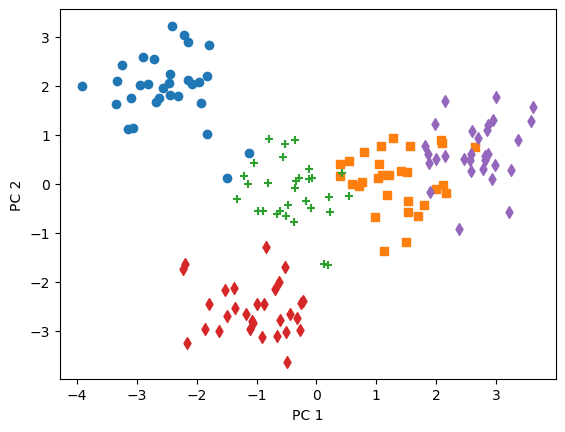

In [27]:
# visualize the extracted features
plt.scatter(Xtest_7[ytest==0, 0], Xtest_7[ytest==0, 1], marker='o')
plt.scatter(Xtest_7[ytest==1, 0], Xtest_7[ytest==1, 1],  marker='s')
plt.scatter(Xtest_7[ytest==2, 0], Xtest_7[ytest==2, 1], marker='+')
plt.scatter(Xtest_7[ytest==3, 0], Xtest_7[ytest==3, 1], marker='d')
plt.scatter(Xtest_7[ytest==4, 0], Xtest_7[ytest==4, 1], marker='d')

plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [28]:
# creating the 
kmeans = KMeans(n_clusters=5, n_init=10, random_state=0)
kmeans_pred = kmeans.fit_predict(Xtest_7)

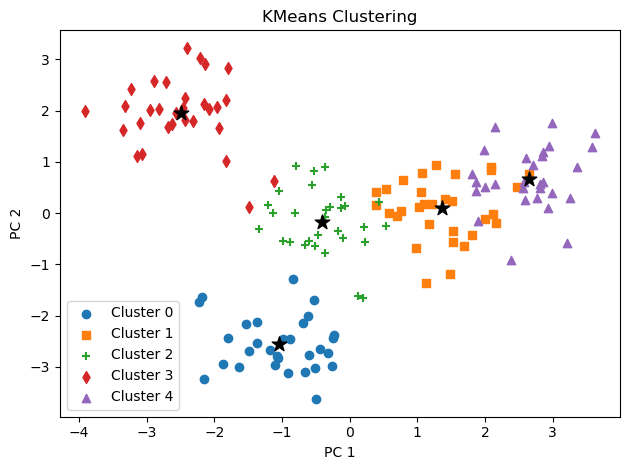

In [29]:
#Visualizing the results
# Plotting each cluster (2D: PC1 vs PC2)
plt.scatter(Xtest_7[kmeans_pred == 0, 0], Xtest_7[kmeans_pred == 0, 1], marker='o',label= 'Cluster 0')
plt.scatter(Xtest_7[kmeans_pred == 1, 0], Xtest_7[kmeans_pred == 1, 1], marker='s',label= 'Cluster 1')
plt.scatter(Xtest_7[kmeans_pred == 2, 0],Xtest_7[kmeans_pred == 2, 1], marker='+', label= 'Cluster 2')
plt.scatter(Xtest_7[kmeans_pred == 3, 0], Xtest_7[kmeans_pred == 3, 1], marker='d', label= 'Cluster 3')
plt.scatter(Xtest_7[kmeans_pred == 4, 0], Xtest_7[kmeans_pred == 4, 1], marker='^', label= 'Cluster 4')
# Centroids (also 2D)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=120, c='black')
# Graph Labels
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title("KMeans Clustering")
plt.legend()
plt.tight_layout()
plt.show()



In [30]:
#Creating the agglomerative clustering model:
agg = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='complete')
# Fitting the model on Xtest_7
agg_pred = agg.fit_predict(Xtest_7)

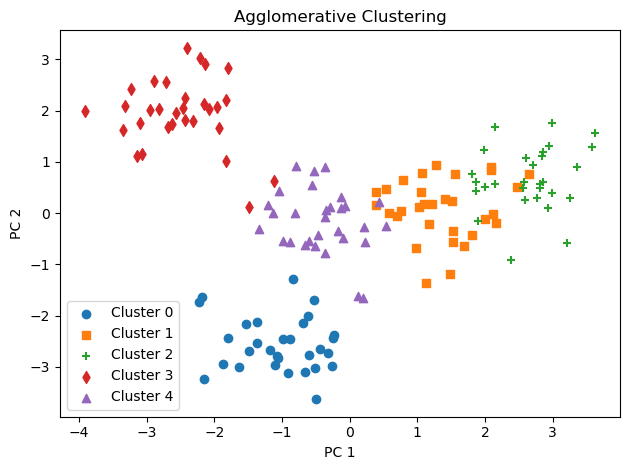

In [31]:
#Visualizing the agglomerative cluster
# Plotting each cluster (2D: PC1 vs PC2)
plt.scatter(Xtest_7[agg_pred == 0, 0], Xtest_7[agg_pred == 0, 1], marker='o', label='Cluster 0')
plt.scatter(Xtest_7[agg_pred == 1, 0], Xtest_7[agg_pred == 1, 1], marker='s', label='Cluster 1')
plt.scatter(Xtest_7[agg_pred == 2, 0], Xtest_7[agg_pred == 2, 1], marker='+', label='Cluster 2')
plt.scatter(Xtest_7[agg_pred == 3, 0], Xtest_7[agg_pred == 3, 1], marker='d', label='Cluster 3')
plt.scatter(Xtest_7[agg_pred == 4, 0], Xtest_7[agg_pred == 4, 1], marker='^', label='Cluster 4')
#Graph lables
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title("Agglomerative Clustering")
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
#perform clustering using DBSCAN
#I used 2.1 eps because that's the first eps with very little noise and same cluster amount.
db = DBSCAN(eps=2.1, min_samples=10, metric='euclidean')
db_pred = db.fit_predict(Xtest_7)
# Get all unique labels that DBSCAN found
np.unique(db_pred, return_counts=True)

(array([-1,  0,  1,  2,  3,  4]), array([10, 29, 28, 29, 25, 29]))

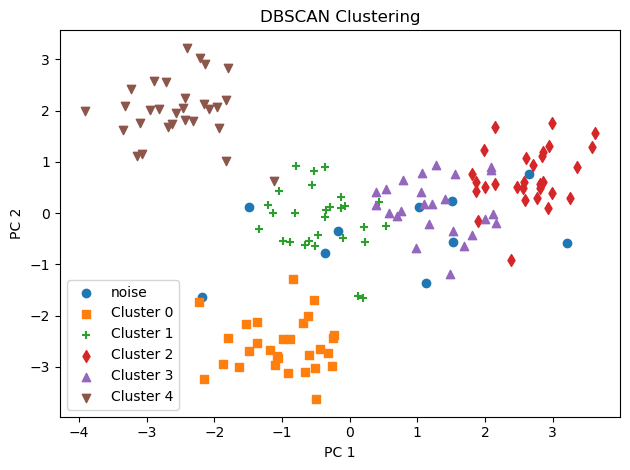

In [33]:
#Visualizing DBSCAN 
#We start with -1 because of the noise
plt.scatter(Xtest_7[db_pred==-1, 0], Xtest_7[db_pred==-1, 1], marker='o', label= 'noise')
plt.scatter(Xtest_7[db_pred==0, 0], Xtest_7[db_pred==0, 1], marker='s', label='Cluster 0')
plt.scatter(Xtest_7[db_pred==1, 0], Xtest_7[db_pred==1, 1], marker='+', label= 'Cluster 1')
plt.scatter(Xtest_7[db_pred==2,0], Xtest_7[db_pred==2, 1], marker='d', label= 'Cluster 2')
plt.scatter(Xtest_7[db_pred==3,0], Xtest_7[db_pred==3, 1], marker='^', label= 'Cluster 3')
plt.scatter(Xtest_7[db_pred==4,0], Xtest_7[db_pred==4, 1], marker='v', label= 'Cluster 4')
#Graph labels
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('DBSCAN Clustering')
plt.legend()
plt.tight_layout()
plt.show()



In [34]:
# perform clustering using HDBSCAN
hdb = HDBSCAN(min_samples=10, metric='euclidean')
hdb_pred = hdb.fit_predict(Xtest_7)

In [35]:
#show unique labels
np.unique(hdb_pred, return_counts=True)
# the array changed, we just have the noise and two clusters now

(array([-1,  0,  1,  2,  3]), array([26, 28, 53, 20, 23]))

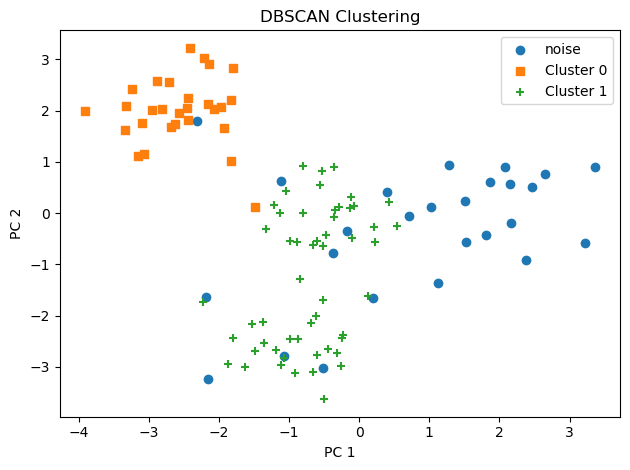

In [36]:
#Visualizing HDBSCAN 
#We start with -1 because of the noise
plt.scatter(Xtest_7[hdb_pred==-1, 0], Xtest_7[hdb_pred==-1, 1], marker='o', label= 'noise')
plt.scatter(Xtest_7[hdb_pred==0, 0], Xtest_7[hdb_pred==0, 1], marker='s', label='Cluster 0')
plt.scatter(Xtest_7[hdb_pred==1, 0], Xtest_7[hdb_pred==1, 1], marker='+', label= 'Cluster 1')
#Graph labels
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('DBSCAN Clustering')
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
# perform clustering using Spectral Clustering
spec = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', assign_labels='kmeans',random_state=0)
spec_pred = spec.fit_predict(Xtest_7)

In [38]:
#Show the labels we got
np.unique(spec_pred, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([29, 30, 30, 30, 31]))

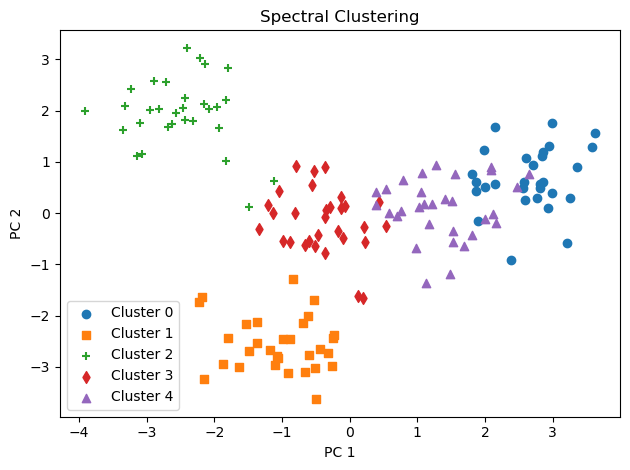

In [39]:
#Visualizing the Spectral cluster
# Plotting each cluster (2D: PC1 vs PC2)
plt.scatter(Xtest_7[spec_pred == 0, 0], Xtest_7[spec_pred == 0, 1], marker='o', label='Cluster 0')
plt.scatter(Xtest_7[spec_pred == 1, 0], Xtest_7[spec_pred == 1, 1], marker='s', label='Cluster 1')
plt.scatter(Xtest_7[spec_pred == 2, 0], Xtest_7[spec_pred == 2, 1], marker='+', label='Cluster 2')
plt.scatter(Xtest_7[spec_pred == 3, 0], Xtest_7[spec_pred == 3, 1], marker='d', label='Cluster 3')
plt.scatter(Xtest_7[spec_pred == 4, 0], Xtest_7[spec_pred == 4, 1], marker='^', label='Cluster 4')
#Graph lables
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title("Spectral Clustering")
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
# perform clustering using Birch
birch= Birch(n_clusters=5, threshold=0.5)
birch_pred=birch.fit_predict(Xtest_7)

In [41]:
np.unique(birch_pred, return_counts=True)

(array([0, 1, 2, 3, 4]), array([30, 32, 30, 29, 29]))

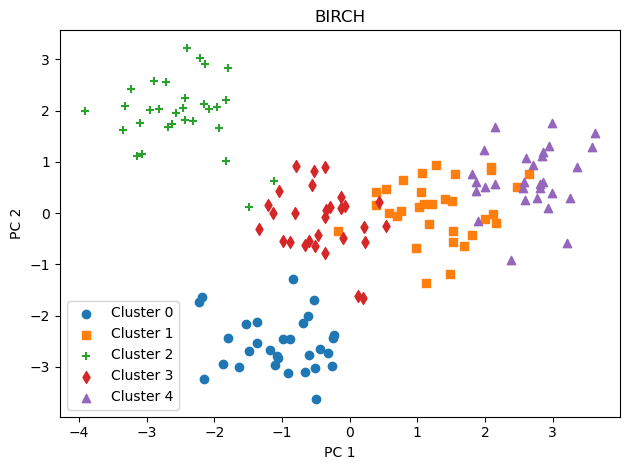

In [42]:
#Visualizing the Birch cluster
# Plotting each cluster (2D: PC1 vs PC2)
plt.scatter(Xtest_7[birch_pred == 0, 0], Xtest_7[birch_pred == 0, 1], marker='o', label='Cluster 0')
plt.scatter(Xtest_7[birch_pred == 1, 0], Xtest_7[birch_pred == 1, 1], marker='s', label='Cluster 1')
plt.scatter(Xtest_7[birch_pred == 2, 0], Xtest_7[birch_pred == 2, 1], marker='+', label='Cluster 2')
plt.scatter(Xtest_7[birch_pred == 3, 0], Xtest_7[birch_pred == 3, 1], marker='d', label='Cluster 3')
plt.scatter(Xtest_7[birch_pred == 4, 0], Xtest_7[birch_pred == 4, 1], marker='^', label='Cluster 4')
#Graph lables
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title("BIRCH")
plt.legend()
plt.tight_layout()
plt.show()

In [43]:
# creating the OPTICS model
# I set the minimum cluster size as 5% of the actual dataset size (150)
opt= OPTICS(min_samples=10,xi=0.05, min_cluster_size=0.05)
opt_pred = opt.fit_predict(Xtest_7)


In [44]:
np.unique(opt_pred, return_counts=True)

(array([-1,  0,  1,  2,  3,  4]), array([13, 29, 27, 24, 28, 29]))

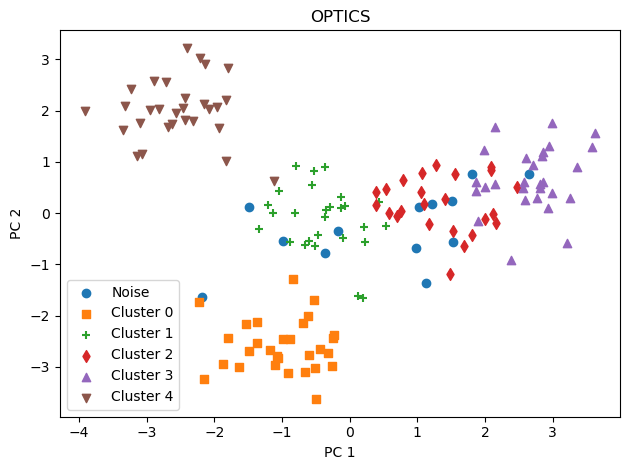

In [45]:
#Visualizing the OPTICS cluster
# Plotting each cluster (2D: PC1 vs PC2)
plt.scatter(Xtest_7[opt_pred == -1, 0], Xtest_7[opt_pred == -1, 1], marker='o', label='Noise')
plt.scatter(Xtest_7[opt_pred == 0, 0], Xtest_7[opt_pred == 0, 1], marker='s', label='Cluster 0')
plt.scatter(Xtest_7[opt_pred == 1, 0], Xtest_7[opt_pred == 1, 1], marker='+', label='Cluster 1')
plt.scatter(Xtest_7[opt_pred == 2, 0], Xtest_7[opt_pred == 2, 1], marker='d', label='Cluster 2')
plt.scatter(Xtest_7[opt_pred == 3, 0], Xtest_7[opt_pred == 3, 1], marker='^', label='Cluster 3')
plt.scatter(Xtest_7[opt_pred == 4, 0], Xtest_7[opt_pred == 4, 1], marker='v', label='Cluster 4')
#Graph lables
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title("OPTICS")
plt.legend()
plt.tight_layout()
plt.show()

In [46]:
# Creating the Affinity Propagation model - cool name
ap = AffinityPropagation(damping=0.5, affinity= 'euclidean')
ap_pred = ap.fit_predict(Xtest_7)

In [47]:
#showing how many cluster AP discovered
np.unique(ap_pred, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([10, 14, 19, 13, 15, 17, 13, 20, 17, 12]))

We got 10 clusters!!!

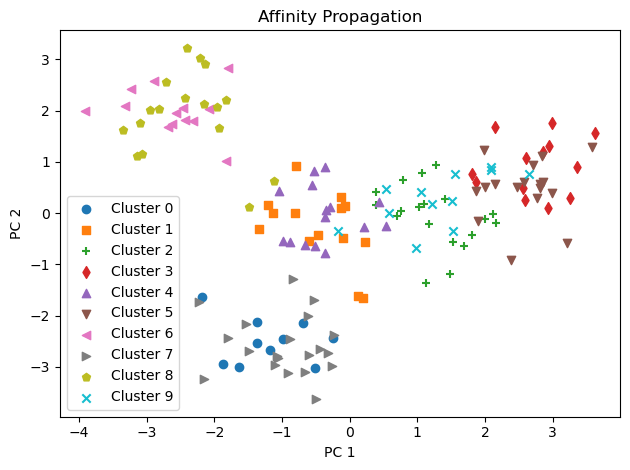

In [48]:
#Visualizing the AP cluster
# Plotting each cluster (2D: PC1 vs PC2)
plt.scatter(Xtest_7[ap_pred == 0, 0], Xtest_7[ap_pred == 0, 1], marker='o', label='Cluster 0')
plt.scatter(Xtest_7[ap_pred == 1, 0], Xtest_7[ap_pred == 1, 1], marker='s', label='Cluster 1')
plt.scatter(Xtest_7[ap_pred == 2, 0], Xtest_7[ap_pred == 2, 1], marker='+', label='Cluster 2')
plt.scatter(Xtest_7[ap_pred == 3, 0], Xtest_7[ap_pred == 3, 1], marker='d', label='Cluster 3')
plt.scatter(Xtest_7[ap_pred == 4, 0], Xtest_7[ap_pred == 4, 1], marker='^', label='Cluster 4')
plt.scatter(Xtest_7[ap_pred == 5, 0], Xtest_7[ap_pred == 5, 1], marker='v', label='Cluster 5')
plt.scatter(Xtest_7[ap_pred == 6, 0], Xtest_7[ap_pred == 6, 1], marker='<', label='Cluster 6')
plt.scatter(Xtest_7[ap_pred == 7, 0], Xtest_7[ap_pred == 7, 1], marker='>', label='Cluster 7')
plt.scatter(Xtest_7[ap_pred == 8, 0], Xtest_7[ap_pred == 8, 1], marker='p', label='Cluster 8')
plt.scatter(Xtest_7[ap_pred == 9, 0], Xtest_7[ap_pred == 9, 1], marker='x', label='Cluster 9')
#Graph lables
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title("Affinity Propagation")
plt.legend()
plt.tight_layout()
plt.show()


***I'm adding the Gaussian Mixture below as 9th clustering because I wanted to explore what it looks like!***

In [49]:
# Creating the Gaussian Mixture Model
gm= GaussianMixture(n_components=5,covariance_type='full')
gm_pred= gm.fit_predict(Xtest_7)


In [50]:
#showing how many cluster gm discovered
np.unique(gm_pred, return_counts=True)

(array([0, 1, 2, 3, 4]), array([30, 29, 30, 31, 30]))

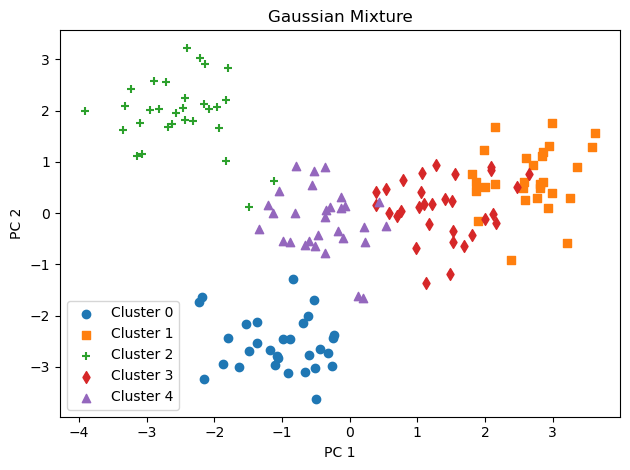

In [51]:
#Visualizing the AP cluster
# Plotting each cluster (2D: PC1 vs PC2)
plt.scatter(Xtest_7[gm_pred == 0, 0], Xtest_7[gm_pred == 0, 1], marker='o', label='Cluster 0')
plt.scatter(Xtest_7[gm_pred == 1, 0], Xtest_7[gm_pred == 1, 1], marker='s', label='Cluster 1')
plt.scatter(Xtest_7[gm_pred == 2, 0], Xtest_7[gm_pred == 2, 1], marker='+', label='Cluster 2')
plt.scatter(Xtest_7[gm_pred == 3, 0], Xtest_7[gm_pred == 3, 1], marker='d', label='Cluster 3')
plt.scatter(Xtest_7[gm_pred == 4, 0], Xtest_7[gm_pred == 4, 1], marker='^', label='Cluster 4')
#Graph lables
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title("Gaussian Mixture")
plt.legend()
plt.tight_layout()
plt.show()